# This Notebook contains a K-Nearest Neighbor(KNN) classifier implementation to classify the Raw Raman Spectra of diabetess patients, and also measures the performance of the model

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

thumbNail.csv
vein.csv
earLobe.csv
innerArm.csv


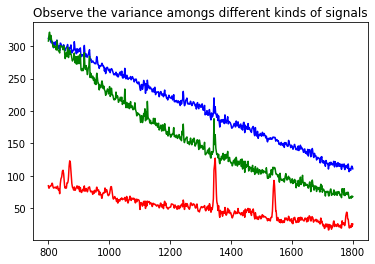

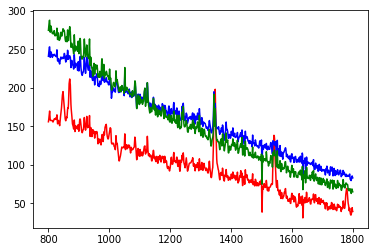

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0] (80, 1)
(80, 1001)


In [2]:
from ..reading_raman import *
print(diabetes.astype('uint8').ravel(), diabetes.shape)
print(ramandata_raw_final.shape)

# KNN classifier on raw spectral dataset

In [3]:
from scipy.io import loadmat
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.metrics import accuracy_score

Crossvalidation fold: 1/5
The best selected K in this fold is 11
The accuracy of this fold is 0.375
Crossvalidation fold: 2/5
The best selected K in this fold is 11
The accuracy of this fold is 0.4375
Crossvalidation fold: 3/5
The best selected K in this fold is 5
The accuracy of this fold is 0.3125
Crossvalidation fold: 4/5
The best selected K in this fold is 1
The accuracy of this fold is 0.1875
Crossvalidation fold: 5/5
The best selected K in this fold is 11
The accuracy of this fold is 0.4375
[11, 11, 5, 1, 11]


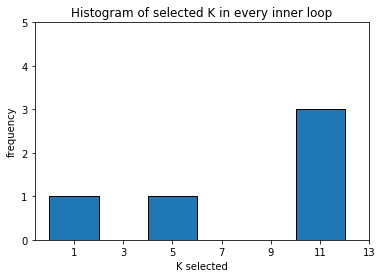

THE ACCURACY OF KNN ON THIS FILE IS : 0.35


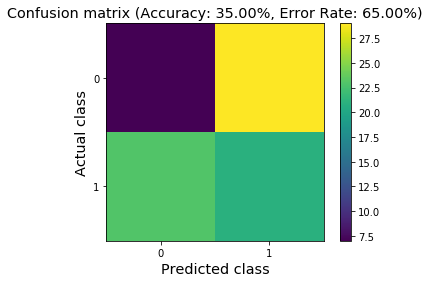

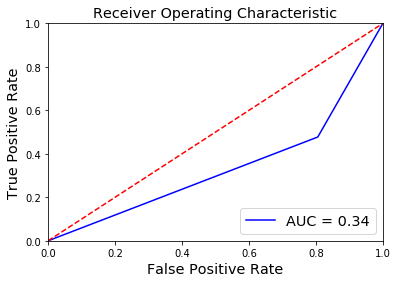

In [10]:
# 2-layer cross validation to tune K and to compute the model performance
num_classes = 2
X = ramandata_raw_final
Y = diabetes.astype('int32')
# 2-layer cross validation on the entire dataset to compute the models expected performance
L = 11    #maximum number of neighbors to be considered
num_splits = 5 #AKA 5-fold cross validation
CV2 = model_selection.KFold(n_splits=num_splits)
CV = model_selection.LeaveOneOut()
j = 0
total_acc = []
y_preds = []
best_K_selected = []
for train_indices,test_indices in CV2.split(X):
    print('Crossvalidation fold: {0}/{1}'.format(j+1, num_splits))
    X_train = X[train_indices]
    y_train = Y[train_indices]
    X_test = X[test_indices]
    y_test = Y[test_indices]

    i = 0
    N = X_train.shape[0]
    errors = np.zeros((N,L))
    for train_index, test_index in CV.split(X_train):
        # extract training and test set for current CV fold
        X_train_inner = X_train[train_index]
        y_train_inner = y_train[train_index]
        X_test_inner = X_train[test_index]
        y_test_inner = y_train[test_index]
        # print(test_index)
        # Fit classifier and classify the test points
        # (consider 1 to L number of neighbors) to choose best L
        for l in range(1,L+1,2):
            knclassifier = KNeighborsClassifier(n_neighbors=l);
            knclassifier.fit(X_train_inner, y_train_inner);
            y_est_inner = knclassifier.predict(X_test_inner);
            errors[i,l-1] = np.sum(y_est_inner[0]!=y_test_inner[0])
        i+=1
    # Choose the best K here and test the accuracy of it here:-
    # Plot the classification error rate per K
    errors_relevant = errors[:, slice(0, L+1, 2)] # take the even numbered elements
    TotalErrors_PerK = sum(errors_relevant, 0)/N   
    # plt.figure()
    x_num = np.arange(1, L+1, 2)
    # uncomment the following lines to get the image as in the report
    # plt.plot(x_num,TotalErrors_PerK,'--or')
    # plt.xlabel('Number of neighbors')
    # plt.ylabel('Classification error rate %')
    # plt.xticks(np.arange(1,l+1,2))
    # plt.show()

    j+=1 # for indicating what fold we are in
    best_k = 2*np.argmin(TotalErrors_PerK)+1
    print("The best selected K in this fold is", best_k)
    knclassifier = KNeighborsClassifier(n_neighbors=best_k);
    knclassifier.fit(X_train, y_train);
    y_est = knclassifier.predict(X_test);
    total_acc.append(accuracy_score(y_test, y_est))
    print("The accuracy of this fold is", accuracy_score(y_test, y_est))
    # print(y_est)
    y_preds += list(y_est)
    # print(y_preds)
    best_K_selected.append(best_k)
print(best_K_selected)
plt.hist(best_K_selected, bins=range(0,L+3,2), edgecolor='black', align='mid')
plt.xticks(range(1, L+3, 2))
plt.yticks(range(6))
plt.xlabel('K selected')
plt.ylabel('frequency')
plt.title('Histogram of selected K in every inner loop')
plt.show()
print("THE ACCURACY OF KNN ON THIS FILE IS :", sum(total_acc)/len(total_acc))

# Plotting the confusion matrix and the AUC-ROC curve
C = num_classes
cm = confusion_matrix(Y, y_preds);
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accuracy = 100*cm.diagonal().sum()/cm.sum(); error_rate = 100-accuracy;
plt.figure(2);
plt.imshow(cm, interpolation='None');
plt.colorbar()
plt.xticks(range(C)); plt.yticks(range(C));
plt.xlabel('Predicted class', fontsize='x-large'); plt.ylabel('Actual class', fontsize='x-large');
plt.title('Confusion matrix (Accuracy: {:4.2f}%, Error Rate: {:4.2f}%)'.format(accuracy, error_rate), fontsize='x-large');
plt.savefig('Images/ConfusionMatrix_knnFullDataset.png')
plt.show()

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y, y_preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic',fontsize='x-large')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right',fontsize='x-large')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',fontsize='x-large')
plt.xlabel('False Positive Rate',fontsize='x-large')
plt.savefig('Images/ROCCurve__knnFullDataset.png')
plt.show()



In [11]:
cm

array([[ 7, 29],
       [23, 21]])